In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando as tabelas

In [9]:
df_transactions = pd.read_csv('transactions.csv')
df_customers = pd.read_csv('customers.csv')
df_products = pd.read_csv('products.csv')
df_contabil = pd.read_csv('contabil.csv')

# Análise em Python

### Calcular o total de vendas por região.
* Total de Vendas por Região: Identificação da região com maior volume de vendas no período analisado.

In [10]:
# JOIN das tabelas, associando cada transação à sua respectiva região
df_join_region = pd.merge(df_customers, df_transactions, on='customer_id', how='left')

# Agrupamento por região e contagem das transações (Vendas)
df_region_count_region = df_join_region.groupby('region')['transaction_id'].count().reset_index()

# Ordenar o resultado pela coluna 'transaction_id' do maior para o menor
df_region_count_region.sort_values(by='transaction_id', ascending=False)


,region,transaction_id
3,Sudeste,237
1,Nordeste,220
4,Sul,212
2,Norte,170
0,Centro-Oeste,161


### Identificar os 5 produtos mais e menos vendidos.

* Produtos Mais Vendidos: Identificação dos cinco produtos com maior volume de vendas, orientando decisões estratégicas.
* Produtos Menos Vendidos: Identificação dos cinco produtos com menor volume de vendas, sugerindo possíveis melhorias.

In [11]:
# JOIN das tabelas, associando cada transação ao seu respectiva produto
df_join_produtcs = pd.merge(df_products, df_transactions, on='product_id', how='left')

# Agrupar por 'name' e contagem dos registros de vendas
df_produtcs_count_produtcs = df_join_produtcs.groupby('name')['transaction_id'].count().reset_index()

# Ordenar o resultado pela coluna 'transaction_id' do maior para o menor
df_produtcs_sum_sorted = df_produtcs_count_produtcs.sort_values(by='transaction_id', ascending=False)

# Exibir os cinco produtos mais vendidos
df_produtcs_sum_sorted.head(5)

# Exibir os cinco produtos Menos vendidos
df_produtcs_sum_sorted.tail(5)

,name,transaction_id
15,Smartwatch Apple,47
12,Processador Intel,46
16,Tablet Samsung,42
17,Teclado Logitech,42
18,Ventoinha Noctua,42


### Calcular a média de vendas diárias e valor médio de vendas diárias


*   Média de Vendas Diárias: Monitoramento do desempenho diário das vendas, identificando dias com maior volume de vendas.



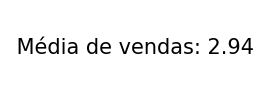

,transaction_date,total_amount,transaction_count,average_daily_sales
0,2023-01-01,4499.84,2,2249.92
1,2023-01-02,2671.41,2,1335.70
2,2023-01-03,9965.00,5,1993.00
3,2023-01-04,12331.58,3,4110.53
4,2023-01-05,6884.93,2,3442.46


In [12]:
# Agrupar por 'data', contando os registros de vendas e somando o total de vendas
daily_sales = df_transactions.groupby('transaction_date').agg(total_amount=('amount', 'sum'),transaction_count=('transaction_id', 'count')).round(2).reset_index()

# Inserindo valor média de vendas em uma coluna
daily_sales['average_daily_sales'] = (daily_sales['total_amount'] / daily_sales['transaction_count']).round(2)

# Criando a figura para exibição da média de vendas diária
plt.figure(figsize=(1, 1))
plt.text(0.5, 0.5, f" Média de vendas: {(daily_sales['transaction_count'].sum() / len(daily_sales)).round(2)}", fontsize=15, ha='center', va='center')

# Removendo os eixos
plt.axis('off')

# Exibindo o gráfico
plt.show()

# Exibindo o relatório com os valores médios de vendas diária
daily_sales.head(5)

# Análise Contábil

### Calcular a margem de lucro
* Margem de Lucro Total: Cálculo da margem de lucro total sobre o valor dos produtos.
* Margem de Lucro por Produto: Cálculo da margem de lucro individual para cada produto.

* Relatório de Margem de Lucro: Relatório detalhado que exporta a margem de lucro por produto para análises mais profundas.
* Gráficos de Margem de Lucro: Visualização gráfica dos cinco produtos com maior e menor margem de lucro, auxiliando na tomada de decisões.

In [13]:
#Calculando a margem de lucro média, utilizando valor médio de vendas total e valor médio gasto em estoque
average_profit_margin = ((df_transactions['amount'].round(2).mean() - df_products['price'].round(2).mean()) / df_transactions['amount'].round(2).mean()) * 100

# Exibindo o resultado
average_profit_margin.round(2)

61.63

In [14]:
# JOIN das tabelas, associando cada transação ao seu respectiva produto
df_join_margin = pd.merge(df_products, df_transactions, on='product_id', how='left')

# Agrupar por 'product_id', 'name', 'category' e 'price' e média dos registros de vendas
df_margin_mean_margin = df_join_margin.groupby(['product_id', 'name', 'category', 'price'])['amount'].mean().round(2).reset_index()

# Calculando a margem de lucro por produto da tabela
df_margin_mean_margin['margem_lucro'] = ((df_margin_mean_margin['amount'] - df_margin_mean_margin['price'] ) / df_margin_mean_margin['amount']).round(2) * 100

# Exibindo o resultado
df_margin_mean_margin

,product_id,name,category,price,amount,margem_lucro
0,1,Notebook Dell,Informática,1500,2552.94,41.0
1,2,iPhone,Eletrônicos,3000,2745.00,-9.0
2,3,Monitor LG,Informática,600,2616.08,77.0
3,4,Teclado Logitech,Acessórios,200,2654.31,92.0
4,5,Mouse Microsoft,Acessórios,100,2722.81,96.0
5,6,Impressora HP,Informática,800,2351.49,66.0
6,7,Tablet Samsung,Eletrônicos,1200,2716.22,56.0
7,8,Headset JBL,Acessórios,300,2282.40,87.0
8,9,Câmera Canon,Eletrônicos,2500,2774.51,10.0
9,10,Smartwatch Apple,Eletrônicos,3500,2640.61,-33.0


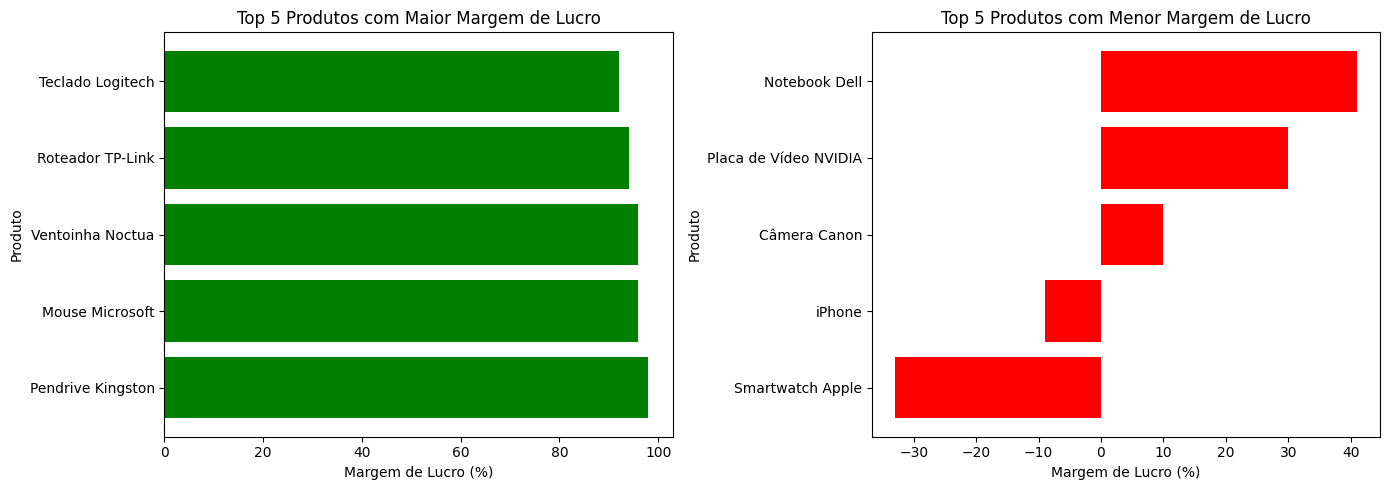

In [15]:
# Ordenando o DataFrame pelos produtos que dão mais lucro
top_5_lucro = df_margin_mean_margin.nlargest(5, 'margem_lucro')

# Ordenando o DataFrame pelos produtos que dão menos lucro
bottom_5_lucro = df_margin_mean_margin.nsmallest(5, 'margem_lucro')

# Criando o gráfico para os 5 produtos que dão mais lucro
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.barh(top_5_lucro['name'], top_5_lucro['margem_lucro'], color='green')
plt.xlabel('Margem de Lucro (%)')
plt.ylabel('Produto')
plt.title('Top 5 Produtos com Maior Margem de Lucro')

# Criando o gráfico para os 5 produtos que dão menos lucro
plt.subplot(1, 2, 2)
plt.barh(bottom_5_lucro['name'], bottom_5_lucro['margem_lucro'], color='red')
plt.xlabel('Margem de Lucro (%)')
plt.ylabel('Produto')
plt.title('Top 5 Produtos com Menor Margem de Lucro')

plt.tight_layout()
plt.show()

## Identificar períodos de maior e menor volume de vendas.
* Volume de Vendas por Período: Gráficos que mostram os períodos de maior e menor volume de vendas.
* Valor de Vendas por Período: Gráficos que mostram os períodos de maior e menor valor de vendas.


### Maior e menor volume de vendas por período

Período com Maior Volume de Vendas:
  year_month  transaction_id
6    2023-07              98

Período com Menor Volume de Vendas:
   year_month  transaction_id
12    2024-01               5


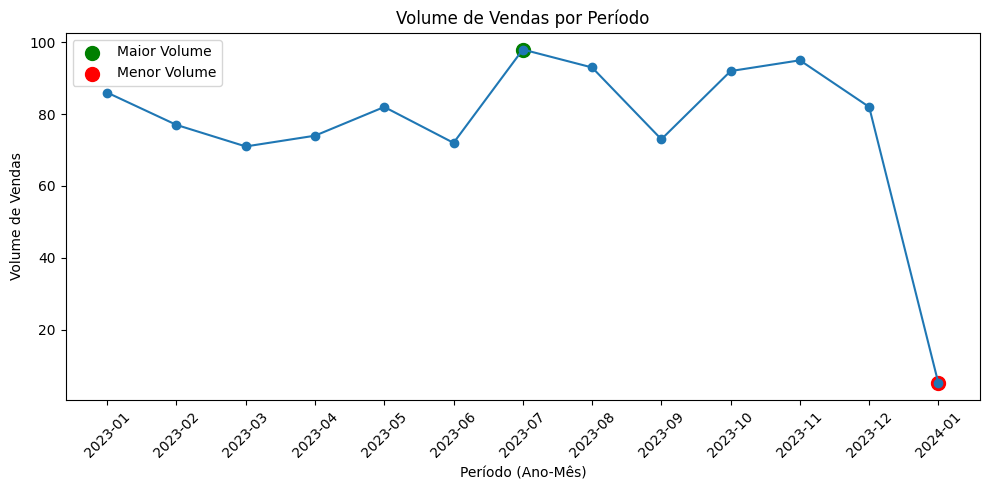

In [16]:
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'], errors='coerce')
df_transactions['year_month'] = df_transactions['transaction_date'].dt.to_period('M')
sales_volume = df_transactions.groupby('year_month')['transaction_id'].count().reset_index()

max_sales_period = sales_volume[sales_volume['transaction_id'] == sales_volume['transaction_id'].max()]
min_sales_period = sales_volume[sales_volume['transaction_id'] == sales_volume['transaction_id'].min()]

print("Período com Maior Volume de Vendas:")
print(max_sales_period.round(2))

print("\nPeríodo com Menor Volume de Vendas:")
print(min_sales_period.round(2))

plt.figure(figsize=(10, 5))
plt.plot(sales_volume['year_month'].astype(str), sales_volume['transaction_id'], marker='o')

plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Volume de Vendas')
plt.title('Volume de Vendas por Período')

plt.scatter(max_sales_period['year_month'].astype(str), max_sales_period['transaction_id'], color='green', s=100, label='Maior Volume')
plt.scatter(min_sales_period['year_month'].astype(str), min_sales_period['transaction_id'], color='red', s=100, label='Menor Volume')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()



### Maior e menor valor de vendas por período

Período com Maior Volume de Vendas:
  year_month     amount
7    2023-08  251622.56

Período com Menor Volume de Vendas:
   year_month    amount
12    2024-01  11219.04


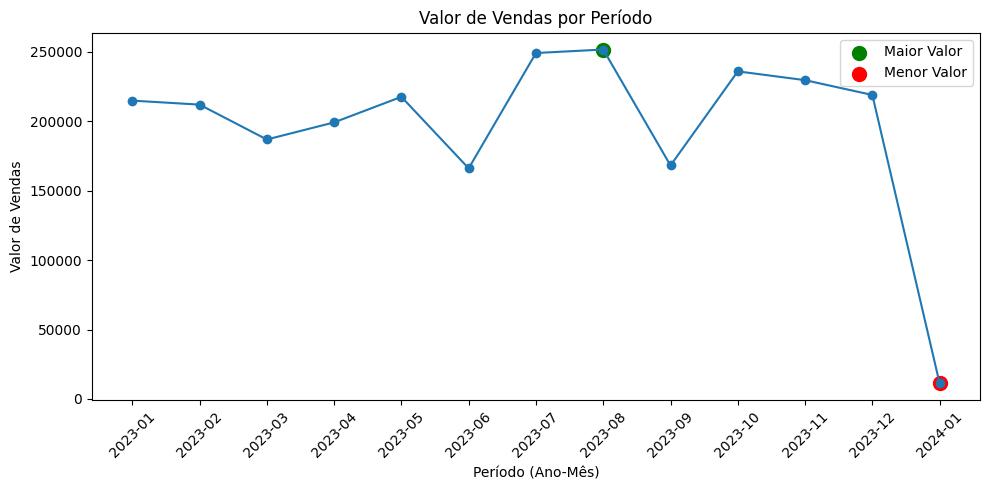

In [17]:
df_transactions['transaction_date'] = pd.to_datetime(df_transactions['transaction_date'], errors='coerce')
df_transactions['year_month'] = df_transactions['transaction_date'].dt.to_period('M')
sales_value = df_transactions.groupby('year_month')['amount'].sum().reset_index()

max_sales_period = sales_value[sales_value['amount'] == sales_value['amount'].max()]
min_sales_period = sales_value[sales_value['amount'] == sales_value['amount'].min()]

print("Período com Maior Volume de Vendas:")
print(max_sales_period.round(2))

print("\nPeríodo com Menor Volume de Vendas:")
print(min_sales_period.round(2))

plt.figure(figsize=(10, 5))
plt.plot(sales_value['year_month'].astype(str), sales_value['amount'], marker='o')

plt.xlabel('Período (Ano-Mês)')
plt.ylabel('Valor de Vendas')
plt.title('Valor de Vendas por Período')

plt.scatter(max_sales_period['year_month'].astype(str), max_sales_period['amount'], color='green', s=100, label='Maior Valor')
plt.scatter(min_sales_period['year_month'].astype(str), min_sales_period['amount'], color='red', s=100, label='Menor Valor')

plt.xticks(rotation=45)
plt.legend()
plt.tight_layout()
plt.show()

